# Online Retail Data Analysis

## 🔄INITIAL DATA EXPLORATION & ENVIRONMENT SETUP

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("online_retail_10_11.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541910.000000,541910.000000,406830.000000
mean,9.552234,4.611138,15287.684160
std,218.080957,96.759765,1713.603074
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  object 
 5   UnitPrice    541910 non-null  float64
 6   CustomerID   406830 non-null  float64
 7   Country      541910 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.shape

(541910, 8)

In [6]:
df.size

4335280

In [7]:
df.columns=df.columns.str.lower()
df.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')

In [8]:
df.isnull().sum()

invoiceno           0
stockcode           0
description      1454
quantity            0
invoicedate         0
unitprice           0
customerid     135080
country             0
dtype: int64

<Axes: title={'center': 'Missing Values'}>

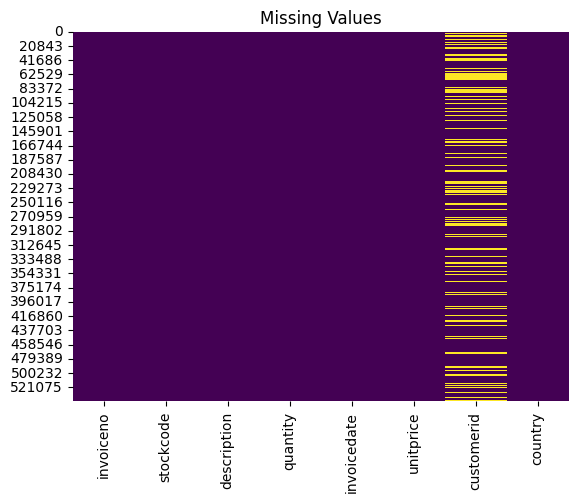

In [9]:
plt.title("Missing Values")
sns.heatmap(df.isnull(),cbar=False,cmap="viridis")

In [10]:
df["customerid"].value_counts()

customerid
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
17986.0       1
13256.0       1
18184.0       1
13747.0       1
15195.0       1
Name: count, Length: 4372, dtype: int64

In [11]:
df["description"].value_counts()

description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
                                      ... 
FLOWER SHOP DESIGN MUG                   1
SET 10 CARDS 3 WISE MEN 17107            1
wrongly marked carton 22804              1
Wrongly mrked had 85123a in box          1
dotcom adjust                            1
Name: count, Length: 4223, dtype: int64

In [12]:
df.duplicated().sum()

np.int64(5268)

In [13]:
df["country"].value_counts()

country
United Kingdom          495478
Germany                   9495
France                    8558
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [14]:
df["revenue"]=df["unitprice"]*df["quantity"]
df["revenue"].sum()

np.float64(9747765.934)

<Axes: title={'center': 'Average Counrty Revenue'}, xlabel='country', ylabel='revenue'>

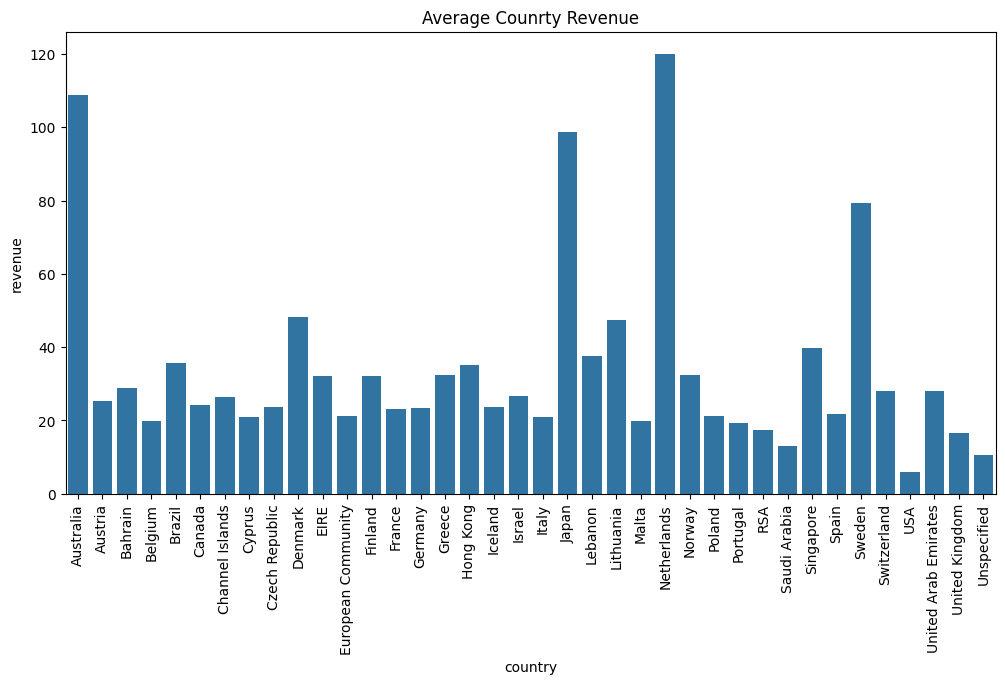

In [15]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title("Average Counrty Revenue")
sns.barplot(df.groupby("country")["revenue"].mean())

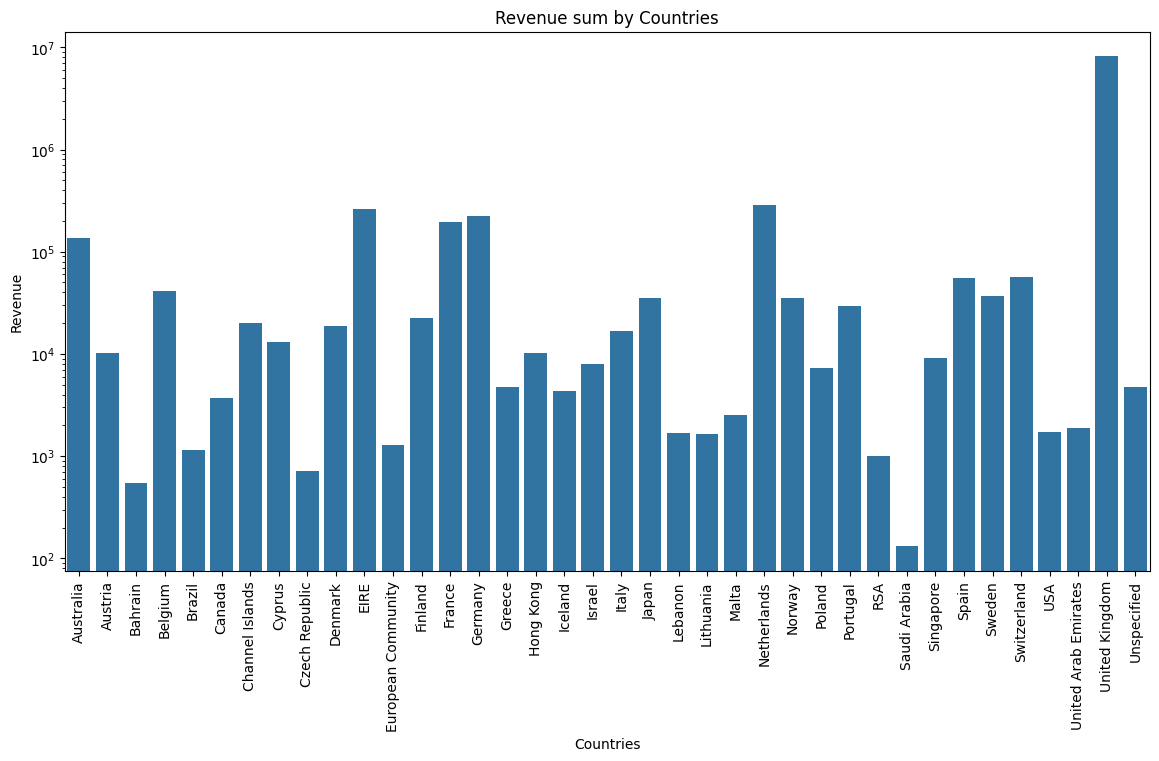

In [16]:
plt.figure(figsize=(14,7))
sns.barplot(df.groupby("country")["revenue"].sum())
plt.yscale("log")
plt.xticks(rotation=90)
plt.title("Revenue sum by Countries")
plt.ylabel("Revenue")
plt.xlabel("Countries")
plt.show()

In [17]:
df["invoicedate"]=pd.to_datetime(df["invoicedate"])
df["year"]=df["invoicedate"].dt.year
yearly_sale=df.groupby("year")["revenue"].sum()
yearly_sale

year
2010     748957.020
2011    8998808.914
Name: revenue, dtype: float64

In [18]:
df["revenue"].mean()

np.float64(17.98779489952206)

##  🧹DATA CLEANING & PREPROCESSING

In [19]:
c=df.dropna(subset="customerid").copy()
c

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,revenue,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010
...,...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,2011


In [20]:
#cancelled orders
cancelled_orders=df[df["invoiceno"].str.startswith("C")].index
c=c.drop(c[c.index.isin(cancelled_orders)].index)
c[c["quantity"]<0] # no values with negative quantities left
c.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,revenue,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010


In [21]:
#dataset for canclled orders analysis
cancelled_df=df[df.index.isin(cancelled_orders)]
cancelled_df

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,revenue,year
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50,2010
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,2010
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,2010
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,2010
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,2010
...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13,2011
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69,2011
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75,2011
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25,2011


In [22]:
no_value=c[c["unitprice"]==0]
c=c[c["unitprice"]>0]
c.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,revenue,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010


0 unitprice products are maybe free samples or they are errors,
in either case they are irrelevant for our analysis

<Axes: ylabel='unitprice'>

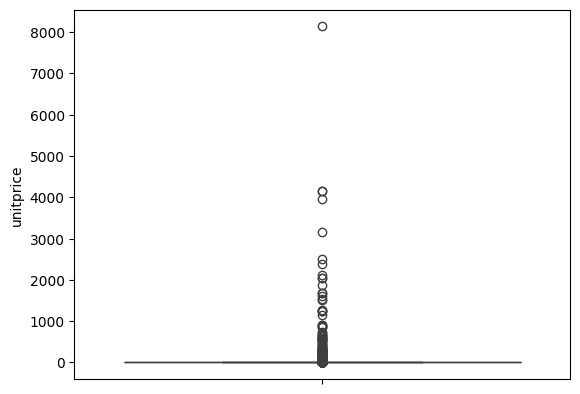

In [23]:
sns.boxplot(c["unitprice"])

<Axes: ylabel='quantity'>

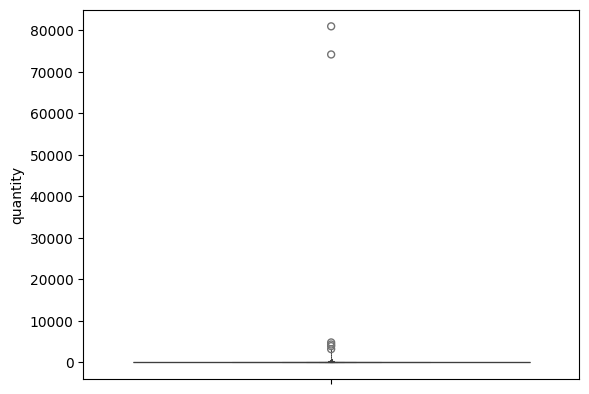

In [24]:
sns.boxenplot(c["quantity"])

In [25]:
c[c["quantity"]>50000]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,revenue,year
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6,2011
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.6,2011


## 🔍 EXPLORATORY DATA ANALYSIS

### Time-Based Analysis

In [26]:
#sale trend by months 

monthly_revenue=c.groupby(c["invoicedate"].dt.month)['revenue'].sum().reset_index(name="Total_revenue")
monthly_revenue

,invoicedate,Total_revenue
0,1,569445.040
1,2,447137.350
2,3,595500.760
3,4,469200.361
4,5,678594.560
5,6,661213.690
6,7,600091.011
7,8,645343.900
8,9,952838.382
9,10,1039318.790


<Axes: title={'center': 'Monthly revenue'}, xlabel='Months', ylabel='Revenue'>

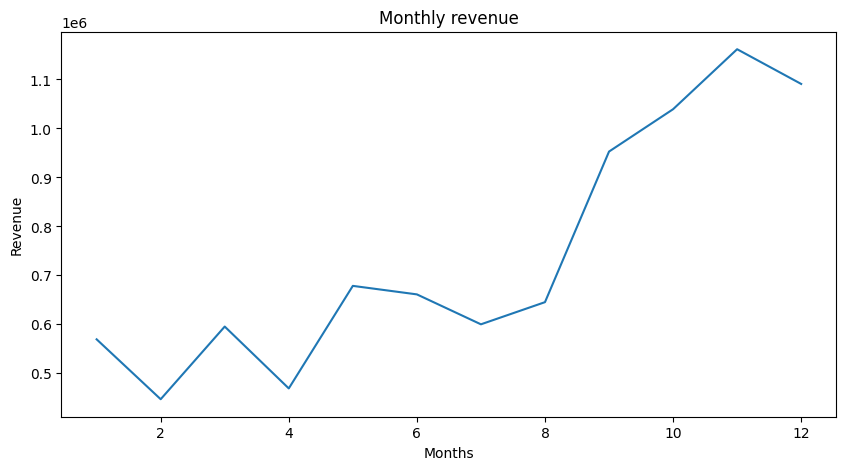

In [27]:
plt.figure(figsize=(10,5))
plt.title("Monthly revenue")
plt.xlabel("Months")
plt.ylabel("Revenue")
sns.lineplot(x=monthly_revenue["invoicedate"],y=monthly_revenue["Total_revenue"])


Monthly sales show a clear upward trend toward the end of the year, with peak sales observed in the final months. This pattern is likely influenced by increased festive-season demand and year-end purchasing behavior.

In [28]:
hourly_revenue=(c.groupby(c["invoicedate"].dt.hour).agg(Total_revenue=("revenue","sum"),orders=("invoiceno","nunique"))
                                                  .reset_index())
hourly_revenue
hourly_revenue.sort_values(by="Total_revenue",ascending=False)

,invoicedate,Total_revenue,orders
6,12,1378589.480,3130
4,10,1261192.571,2226
7,13,1173264.750,2636
5,11,1104558.750,2277
8,14,995629.371,2274
9,15,966191.750,2037
3,9,842605.171,1393
10,16,468885.800,1100
2,8,282115.630,555
11,17,234413.521,544


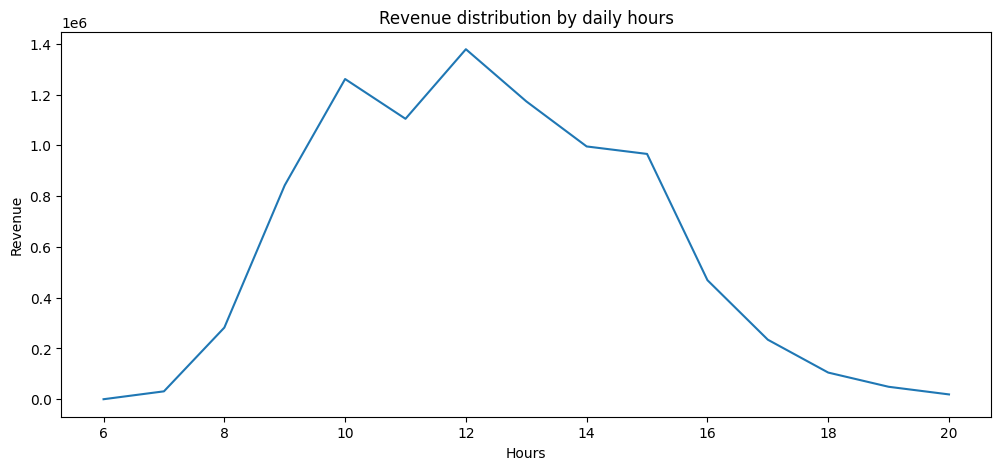

In [29]:
plt.figure(figsize=(12,5))
plt.title("Revenue distribution by daily hours")
sns.lineplot(data=hourly_revenue,x="invoicedate",y="Total_revenue")
plt.ylabel("Revenue")
plt.xlabel("Hours")
plt.show()

Hourly sales analysis reveals revenue peaks around 10:00, 12:00, and 13:00 hours. These time windows coincide with common work break periods, suggesting that purchasing activity may be influenced by buyer availability during office hours. **This insight can be leveraged by scheduling targeted and attractive promotional notifications during these peak hours to maximize engagement and conversions.**

In [30]:
# Heatmap - Day of week vs hour of day sales patterns
h=c.copy()
h["hour"]=h["invoicedate"].dt.hour

day_hour=h.groupby([h["invoicedate"].dt.day_name(),"hour"])["revenue"].sum().reset_index()
day_hour=day_hour.rename(columns={"invoicedate":"day"})

piv=day_hour.pivot(index="day",columns="hour",values="revenue")
order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Sunday"]
piv=piv.reindex(order)
piv

hour,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
day,,,,,,,,,,,,,,,
Monday,NaN,1494.58,43358.33,123987.220,184190.320,160863.69,185186.20,225840.81,188026.830,141110.60,74796.41,38291.421,NaN,NaN,NaN
Tuesday,NaN,2052.58,72469.67,164290.630,295075.641,261161.63,245608.09,212115.47,161317.590,167689.82,90515.02,28039.470,299.02,NaN,NaN
Wednesday,NaN,3343.46,45770.27,122937.900,243484.830,201732.48,277251.32,232498.54,179514.430,160391.73,81681.32,23644.990,NaN,3053.40,13031.50
Thursday,4.25,6883.71,67860.75,134141.940,273926.730,170818.61,286226.14,196805.23,201248.360,229997.31,138509.83,114375.580,104579.91,45601.60,5879.12
Friday,NaN,17284.88,52656.61,296468.681,183204.580,166918.03,230165.75,167563.00,160028.500,136998.01,44114.20,30062.060,75.50,373.46,22.14
Sunday,NaN,NaN,NaN,778.800,81310.470,143064.31,154151.98,138441.70,105493.661,130004.28,39269.02,NaN,NaN,NaN,NaN


<Axes: title={'center': 'Revenue heatmap by day and hour'}, xlabel='hour', ylabel='day'>

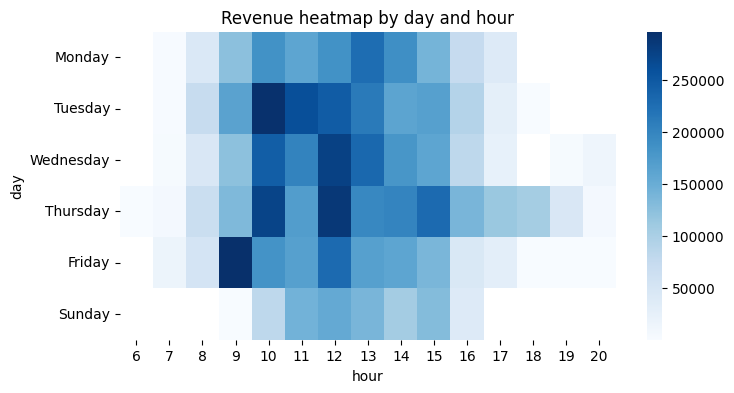

In [31]:
plt.figure(figsize=(8,4))
plt.title("Revenue heatmap by day and hour")
sns.heatmap(piv,cmap="Blues")

--Revenue is concentrated during late morning and early afternoon hours

--Weekdays show stronger purchasing activity compared to weekends

--Peak hours largely fall within standard business hours, suggesting a significant presence of B2B or office-hour buyers

### Customer Analysis

In [32]:
r=c.copy()
r["last_order"]=r.groupby("customerid")["invoicedate"].transform("max")
reference=r["last_order"].max()


rfm=r.groupby("customerid").agg(recency=("invoicedate",lambda x:(reference-x.max())),frequency=("invoiceno","nunique")
                            ,monetary=("revenue","sum")).reset_index()
rfm["recency"]=rfm["recency"].dt.days
rfm.head()

,customerid,recency,frequency,monetary
0,12346.0,325,1,77183.60
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40


In [33]:
rfm["frequency_category"]=np.select(condlist=[rfm['frequency']==1],choicelist=["One-time buyer"],default="Repeat customer")

rfm['average_order_value']=rfm["monetary"]/rfm["frequency"]

rfm.head()

,customerid,recency,frequency,monetary,frequency_category,average_order_value
0,12346.0,325,1,77183.60,One-time buyer,77183.600000
1,12347.0,1,7,4310.00,Repeat customer,615.714286
2,12348.0,74,4,1797.24,Repeat customer,449.310000
3,12349.0,18,1,1757.55,One-time buyer,1757.550000
4,12350.0,309,1,334.40,One-time buyer,334.400000


In [34]:
rfm.groupby("frequency_category")["monetary"].sum()

frequency_category
One-time buyer      616311.731
Repeat customer    8295114.173
Name: monetary, dtype: float64

In [35]:
#percent contribution of top 20 percent of customers 
top_20=rfm.sort_values(by="monetary",ascending=False).head(round(rfm.shape[0]*.2))
percent_contribution=round(top_20["monetary"].sum()*100/rfm["monetary"].sum(),2)
percent_contribution

np.float64(74.62)

Analysis shows that the top 20% of customers contribute approximately 74% of total revenue, indicating a strong revenue concentration among high-value customers. This highlights the importance of retaining and nurturing this segment, as churn within this group could significantly impact overall revenue.

### Product Analysis

In [36]:
top_products_quantity=(c.groupby("description")["quantity"]
                             .sum().reset_index().sort_values(by="quantity",ascending=False).head(10))
top_products_quantity

,description,quantity
2319,"PAPER CRAFT , LITTLE BIRDIE",80995
1992,MEDIUM CERAMIC TOP STORAGE JAR,77916
3786,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415
1762,JUMBO BAG RED RETROSPOT,46181
3698,WHITE HANGING HEART T-LIGHT HOLDER,36725
216,ASSORTED COLOUR BIRD ORNAMENT,35362
2269,PACK OF 72 RETROSPOT CAKE CASES,33693
2600,POPCORN HOLDER,30931
2656,RABBIT NIGHT LIGHT,27202
2047,MINI PAINT SET VINTAGE,26076


In [37]:
# percent contribution of top 10 products by quantity

(top_products_quantity["quantity"].sum()*100)/c["quantity"].sum()

np.float64(8.697992748576622)

In [38]:
top_products_revenue=(c.groupby("description")["revenue"]
                             .sum().reset_index().sort_values(by="revenue",ascending=False).head(20))
top_products_revenue

,description,revenue
2319,"PAPER CRAFT , LITTLE BIRDIE",168469.60
2767,REGENCY CAKESTAND 3 TIER,142592.95
3698,WHITE HANGING HEART T-LIGHT HOLDER,100448.15
1762,JUMBO BAG RED RETROSPOT,85220.78
1992,MEDIUM CERAMIC TOP STORAGE JAR,81416.73
2611,POSTAGE,77821.96
2345,PARTY BUNTING,68844.33
216,ASSORTED COLOUR BIRD ORNAMENT,56580.34
2130,Manual,53779.93
2656,RABBIT NIGHT LIGHT,51346.20


In [39]:
# percent contribution of top 20 products by revenue

(top_products_revenue["revenue"].sum()*100)/c["revenue"].sum()

np.float64(14.17712320800328)

In [40]:
# Which products are frequently returned?

cancelled_df

highest_returned_orders=(cancelled_df.groupby("description")["invoiceno"].
                         nunique().reset_index().sort_values(by="invoiceno",ascending=False).head(10))
highest_returned_orders

,description,invoiceno
1093,Manual,223
1399,REGENCY CAKESTAND 3 TIER,180
1305,POSTAGE,124
887,JAM MAKING SET WITH JARS,87
1534,SET OF 3 CAKE TINS PANTRY DESIGN,73
538,Discount,65
1457,ROSES REGENCY TEACUP AND SAUCER,54
1709,STRAWBERRY CERAMIC TRINKET BOX,52
1323,RECIPE BOX PANTRY YELLOW DESIGN,47
990,LUNCH BAG RED RETROSPOT,43


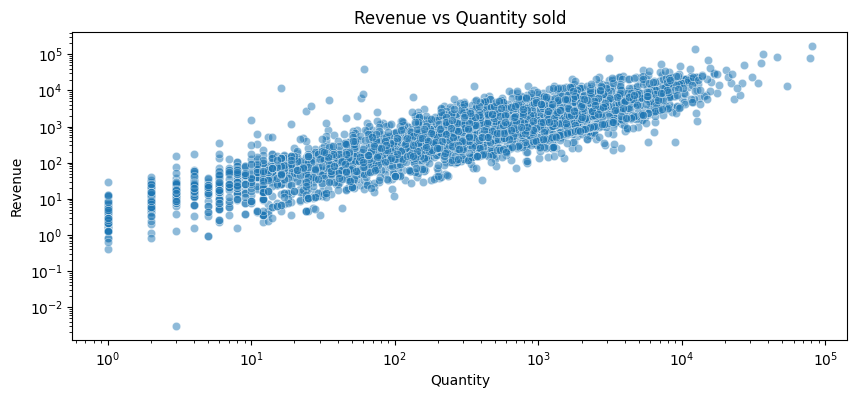

In [41]:
product_rq=c.groupby("description").agg(revenue=("revenue","sum"),quantity=("quantity","sum"))

plt.figure(figsize=(10,4))
plt.xscale("log")
plt.yscale("log")
sns.scatterplot(data=product_rq,x="quantity",y="revenue",alpha=.5)
plt.title("Revenue vs Quantity sold")
plt.xlabel("Quantity")
plt.ylabel("Revenue")
plt.show()

### Geographic Analysis

In [42]:
# UK comparison to rest of the world
rev_from_uk=c[c["country"]=="United Kingdom"]['revenue'].sum()

rev_from_uk*100/c["revenue"].sum()

np.float64(82.01147193200072)

In [43]:
quan_from_uk=c[c["country"]=="United Kingdom"]['quantity'].sum()

quan_from_uk*100/c["quantity"].sum()

np.float64(82.37024056404518)

In [44]:
unique_customers=(c.groupby("country")['customerid'].nunique().reset_index())
unique_customers

,country,customerid
0,Australia,9
1,Austria,11
2,Bahrain,2
3,Belgium,25
4,Brazil,1
5,Canada,4
6,Channel Islands,9
7,Cyprus,8
8,Czech Republic,1
9,Denmark,9


Text(0.5, 1.0, 'Customers in each Country')

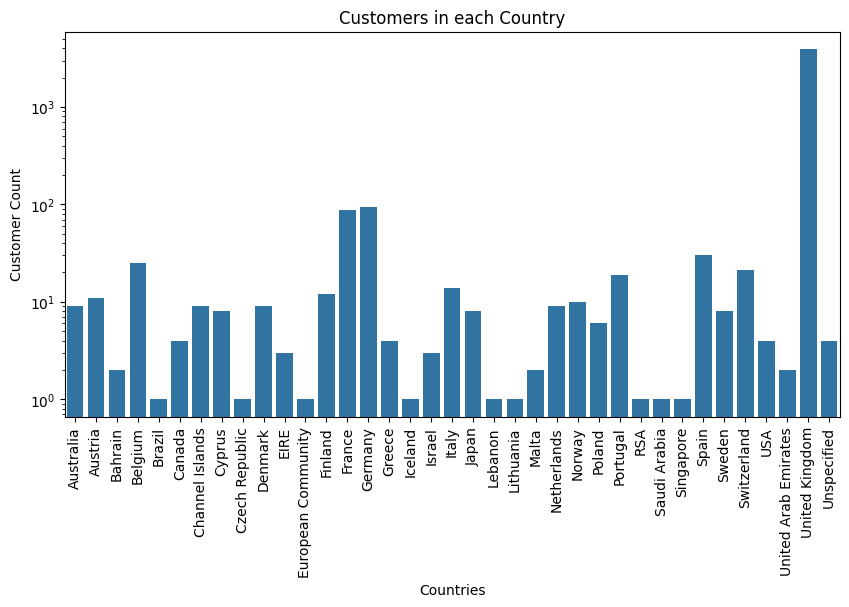

In [45]:
plt.figure(figsize=(10,5))
plt.yscale("log")
plt.xticks(rotation=90)
sns.barplot(data=unique_customers,x="country",y="customerid")
plt.ylabel("Customer Count")
plt.xlabel("Countries")
plt.title("Customers in each Country")

## 🎯CUSTOMER SEGMENTATION & BEHAVIOR ANALYSIS

In [46]:
rfm.head()

,customerid,recency,frequency,monetary,frequency_category,average_order_value
0,12346.0,325,1,77183.60,One-time buyer,77183.600000
1,12347.0,1,7,4310.00,Repeat customer,615.714286
2,12348.0,74,4,1797.24,Repeat customer,449.310000
3,12349.0,18,1,1757.55,One-time buyer,1757.550000
4,12350.0,309,1,334.40,One-time buyer,334.400000


In [47]:
rfm["segment"]=pd.cut(rfm["recency"],bins=[-1,30,90,180,rfm["recency"].max()]
                      ,labels=["active","warm","at risk","lost"])

rfm.head()

,customerid,recency,frequency,monetary,frequency_category,average_order_value,segment
0,12346.0,325,1,77183.60,One-time buyer,77183.600000,lost
1,12347.0,1,7,4310.00,Repeat customer,615.714286,active
2,12348.0,74,4,1797.24,Repeat customer,449.310000,warm
3,12349.0,18,1,1757.55,One-time buyer,1757.550000,active
4,12350.0,309,1,334.40,One-time buyer,334.400000,lost


In [48]:
segment_summary=rfm.groupby("segment").agg(monetary=("monetary","sum")
                           ,orders=("frequency","sum"),
                          customers=("customerid", "nunique"),
                          avg_order_value=("monetary","mean")).reset_index()
segment_summary

C:\Users\Mayank\AppData\Local\Temp\ipykernel_29100\4142369952.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_summary=rfm.groupby("segment").agg(monetary=("monetary","sum")


,segment,monetary,orders,customers,avg_order_value
0,active,6342869.470,12194,1694,3744.314917
1,warm,1535192.353,3657,1199,1280.393956
2,at risk,477836.900,1391,587,814.032198
3,lost,555527.181,1290,858,647.467577


The analysis shows that approximately **1,445 customers** fall into the **At Risk** and **Lost** segments combined.
Although these customers are currently inactive or disengaging, they represent a **significant portion of the customer base** and therefore a meaningful opportunity for recovery.

Rather than acquiring new customers at a higher cost, the business can focus on **win-back strategies** for 
these segments,such as:
- Targeted re-engagement emails
- Time-limited discounts or personalized offers
- Reminder campaigns highlighting previously purchased products



### Cohort Analysis

In [49]:
coh=c.copy()
coh["month"]=coh["invoicedate"].dt.to_period("M")
coh["first_order"]=coh.groupby("customerid")["month"].transform("min")
coh=coh.rename(columns={"first_order":"cohort_month"})


coh["cohort_index"]=coh["month"].astype(int)-coh["cohort_month"].astype(int)
cohort=coh.groupby(["cohort_month","cohort_index"])["customerid"].nunique().reset_index()

piv=cohort.pivot(index="cohort_month",columns="cohort_index",values="customerid")
val=piv.loc[:,0]
result=round(piv.divide(val,axis=0)*100)
result

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,,
2010-12,100.0,37.0,32.0,38.0,36.0,40.0,36.0,35.0,35.0,40.0,37.0,50.0,27.0
2011-01,100.0,22.0,27.0,23.0,32.0,29.0,25.0,24.0,30.0,33.0,36.0,12.0,NaN
2011-02,100.0,19.0,19.0,28.0,27.0,25.0,25.0,28.0,25.0,31.0,7.0,NaN,NaN
2011-03,100.0,15.0,25.0,20.0,22.0,17.0,27.0,23.0,28.0,9.0,NaN,NaN,NaN
2011-04,100.0,21.0,20.0,21.0,20.0,23.0,22.0,26.0,7.0,NaN,NaN,NaN,NaN
2011-05,100.0,19.0,17.0,17.0,21.0,23.0,26.0,10.0,NaN,NaN,NaN,NaN,NaN
2011-06,100.0,17.0,16.0,26.0,23.0,33.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,100.0,18.0,21.0,22.0,27.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,100.0,21.0,25.0,24.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cohort analysis groups customers by their **first interaction or acquisition period** and then tracks their behavior over time. 

 **Customer Retention**  
 - Shows how many customers from a specific cohort continue to engage or make purchases in subsequent periods.
 - Highlights drop-off points, helping identify when customers are most likely to churn.

 **Behavior Over Time**  
 - Compares cohorts of different acquisition months to see if newer customers behave differently than older ones.
 - Reveals trends such as increasing or decreasing engagement over time.

 **Impact of Marketing or Promotions**  
 - Helps assess whether campaigns or seasonal promotions improve retention for a particular cohort.

In short, cohort analysis helps answer the question: **“How do customers acquired at different times behave over their lifecycle, and how can we improve retention and revenue?”**

Text(0.5, 25.722222222222214, ' ')

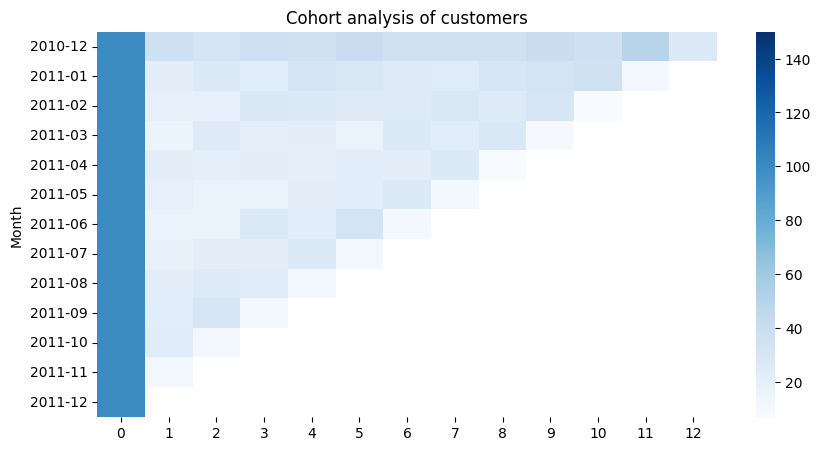

In [50]:
plt.figure(figsize=(10,5))
sns.heatmap(result,cmap="Blues",vmax=150)
plt.title("Cohort analysis of customers")
plt.ylabel("Month")
plt.xlabel(" ")

The cohort heatmap visualizes customer retention over time. 
Each cell represents the percentage of customers from a cohort that remain active in subsequent periods.
Using percentages normalizes across cohorts of different sizes, making trends immediately visible and comparable.
Darker colors indicate higher retention, lighter colors indicate drop-off.


## 📦PRODUCT & INVENTORY ANALYSIS

In [51]:
pric_rev=c.groupby(["description","unitprice"])["revenue"].sum().reset_index()
pric_rev.head()

,description,unitprice,revenue
0,4 PURPLE FLOCK DINNER CANDLES,0.79,38.71
1,4 PURPLE FLOCK DINNER CANDLES,2.55,232.05
2,50'S CHRISTMAS GIFT BAG LARGE,1.04,416.00
3,50'S CHRISTMAS GIFT BAG LARGE,1.25,1856.25
4,DOLLY GIRL BEAKER,1.08,1512.00


Text(0.5, 1.0, 'Price and Revenue correlation')

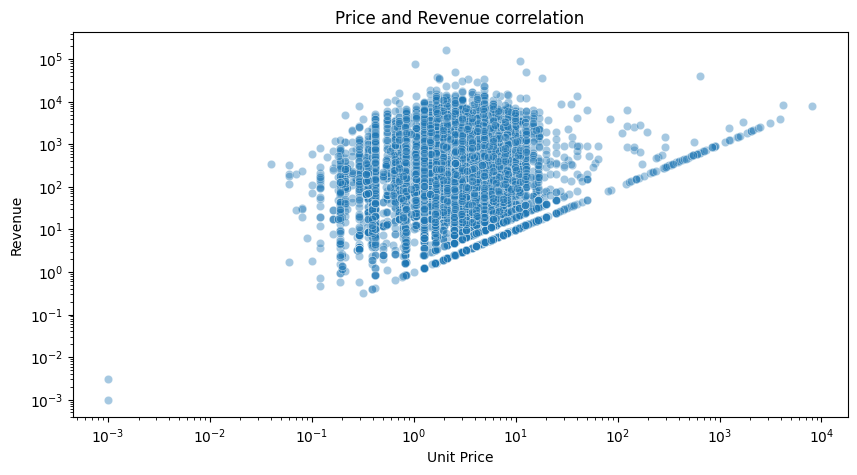

In [52]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=pric_rev,x="unitprice",y="revenue",alpha=0.4)
plt.yscale("log")
plt.xscale("log")
plt.ylabel('Revenue')
plt.xlabel("Unit Price")
plt.title("Price and Revenue correlation")

The log–log scatter plot shows a positive relationship between unit price and revenue. Higher-priced products generally generate more revenue, even at lower sales volumes, while lower-priced items depend on high quantity sold. This suggests that premium-priced products play a significant role in overall revenue, highlighting opportunities for pricing and product mix optimization.

In [53]:
rev_volume=c.groupby("description").agg(revenue=("revenue","sum"),volume=("quantity","sum")).reset_index()
rev_volume.head()

,description,revenue,volume
0,4 PURPLE FLOCK DINNER CANDLES,270.76,140
1,50'S CHRISTMAS GIFT BAG LARGE,2272.25,1885
2,DOLLY GIRL BEAKER,2759.50,2398
3,I LOVE LONDON MINI BACKPACK,1454.00,360
4,I LOVE LONDON MINI RUCKSACK,4.15,1


Text(0, 0.5, 'Revenue')

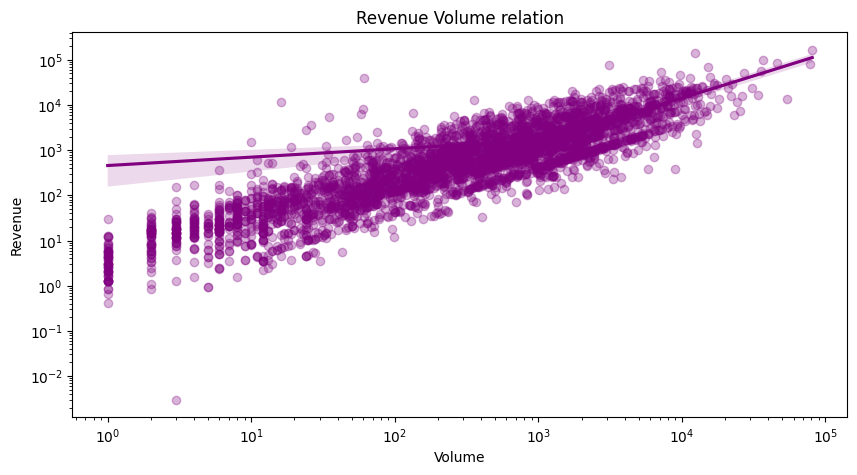

In [54]:
plt.figure(figsize=(10,5))
sns.regplot(data=rev_volume,x="volume",y="revenue",scatter_kws={"alpha":0.3},color="purple")
plt.xscale("log")
plt.yscale("log")
plt.title("Revenue Volume relation")
plt.xlabel("Volume")
plt.ylabel("Revenue")

indicating a positive relationship between sales volume and total revenue. Products that sell in higher quantities tend to generate significant revenue.

This confirms that revenue growth is largely driven by high-demand products, emphasizing the importance of inventory planning and promotional focus on fast-moving items.

In [55]:
# frequently bough together products 
from itertools import combinations

bought_toge=c.groupby("invoiceno")["stockcode"].apply(list)
pairs=bought_toge.apply(lambda x: list(combinations(sorted(x),2)))

listed=[]

for subsets in pairs:
    for pair in subsets:
        listed.append(pair)

        
allpairs=pd.Series(listed).value_counts().sort_values(ascending=False).reset_index()
allpairs.head(20)

,index,count
0,"(22697, 22698)",721
1,"(22697, 22699)",618
2,"(22386, 85099B)",579
3,"(22726, 22727)",579
4,"(20725, 20727)",571
5,"(20725, 22384)",562
6,"(20725, 22383)",557
7,"(20727, 22383)",523
8,"(22698, 22699)",515
9,"(20727, 22384)",511


Market basket analysis identified frequently purchased product pairs with high sales frequency. These combinations indicate strong customer buying patterns and natural product associations.

Offering targeted bundle discounts or combo deals on these high-frequency product pairs can increase average order value, encourage cross-selling, and strengthen customer purchase behavior.

In [56]:
# product segmentation on revenue
prod=c.groupby("description").agg(revenue=("revenue","sum"),orders=("invoiceno","nunique"),
                             quantity=("quantity","sum")).reset_index().sort_values(by="revenue",ascending=False)

prod["cum_sum"]=prod["revenue"].cumsum()
prod["cum_perc"]=prod["cum_sum"]*100/prod["revenue"].sum()

conditions=[(prod["cum_perc"]<80),((prod["cum_perc"]>=80)&(prod["cum_perc"]<95)),(prod["cum_perc"]>=95)]
value=["A","B","c"]

prod["segment"]=np.select(conditions,value,default="unknown")

prod.tail()

,description,revenue,orders,quantity,cum_sum,cum_perc,segment
2639,PURPLE FRANGIPANI HAIRCLIP,0.850,1,1,8911423.991,99.999979,c
3556,VINTAGE BLUE TINSEL REEL,0.840,1,2,8911424.831,99.999988,c
2933,SET 12 COLOURING PENCILS DOILEY,0.650,1,1,8911425.481,99.999995,c
1628,HEN HOUSE W CHICK IN NEST,0.420,1,1,8911425.901,100.000000,c
2275,PADS TO MATCH ALL CUSHIONS,0.003,3,3,8911425.904,100.000000,c


In [57]:
seg_analysis=prod.groupby("segment").agg(revenue=("revenue","sum"),orders=("orders","sum"),
                                         quantity=("quantity","sum")).reset_index()
seg_analysis

,segment,revenue,orders,quantity
0,A,7127784.780,247371,3477776
1,B,1337748.670,96298,1184372
2,c,445892.454,44070,505665


<Figure size 1000x500 with 0 Axes>

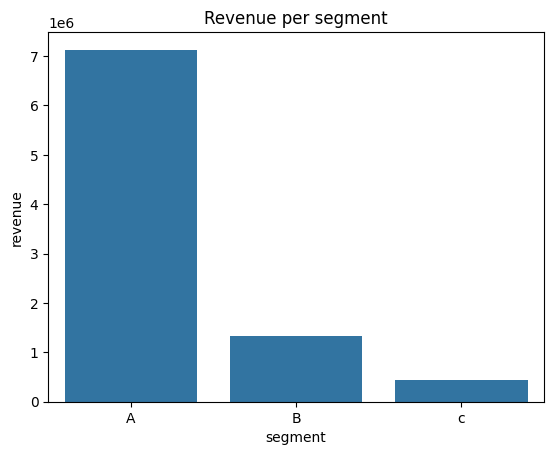

<Figure size 1000x500 with 0 Axes>

In [58]:
plt.title("Revenue per segment")
sns.barplot(data=seg_analysis,x="segment",y="revenue")
plt.figure(figsize=(10,5))

In [59]:
prod["segment"].value_counts()

segment
c    2108
B     959
A     810
Name: count, dtype: int64

The A-segment products contribute the highest share of total revenue by a significant margin compared to B and C segments. Despite representing a relatively small proportion of the total product portfolio, these products generate the majority of sales, confirming a strong Pareto (80/20) effect.

This indicates that revenue is highly concentrated among a limited number of high-performing products. Therefore, A-category items should receive priority in inventory management, stock availability, and marketing focus, as any disruption in this segment could substantially impact overall revenue.

In [60]:
prod["description"].head(10)
top_10=c[c["description"].isin(prod["description"].head(10))]

monthly_sale=top_10.groupby(["description",top_10["invoicedate"].dt.to_period("M")])["revenue"].sum().reset_index().sort_values(
    by=["description","invoicedate"])


monthly_sale["invoicedate"]=monthly_sale["invoicedate"].dt.to_timestamp()
monthly_sale.head(5)

,description,invoicedate,revenue
0,ASSORTED COLOUR BIRD ORNAMENT,2010-12-01,3666.11
1,ASSORTED COLOUR BIRD ORNAMENT,2011-01-01,2744.75
2,ASSORTED COLOUR BIRD ORNAMENT,2011-02-01,2620.91
3,ASSORTED COLOUR BIRD ORNAMENT,2011-03-01,3997.98
4,ASSORTED COLOUR BIRD ORNAMENT,2011-04-01,3886.72


In [61]:
mon_piv=monthly_sale.pivot(index="description",columns="invoicedate",values="revenue")
mon_piv

invoicedate,2010-12-01,2011-01-01,2011-02-01,2011-03-01,2011-04-01,2011-05-01,2011-06-01,2011-07-01,2011-08-01,2011-09-01,2011-10-01,2011-11-01,2011-12-01
description,,,,,,,,,,,,,
ASSORTED COLOUR BIRD ORNAMENT,3666.11,2744.75,2620.91,3997.98,3886.72,4977.24,2523.64,2992.99,9665.93,4866.64,4385.27,8252.70,1999.46
JUMBO BAG RED RETROSPOT,3619.20,4542.75,5191.05,8496.88,4141.78,6585.20,6628.42,5654.60,9871.44,7992.01,9763.06,10713.99,2020.40
MEDIUM CERAMIC TOP STORAGE JAR,NaN,77183.60,NaN,NaN,NaN,869.04,458.51,826.94,486.09,397.26,283.67,708.11,203.51
Manual,228.17,94.40,425.33,4912.91,10108.50,4302.91,771.11,1547.77,2989.54,3431.24,21543.63,2986.32,438.10
"PAPER CRAFT , LITTLE BIRDIE",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168469.60
PARTY BUNTING,793.50,1819.80,3476.90,6129.15,7278.45,13437.95,8271.10,10311.15,6306.05,4406.80,2432.47,3715.71,465.30
POSTAGE,4430.00,5109.00,3166.00,5325.00,3409.95,13358.75,5510.02,5311.34,5185.95,5894.50,7993.50,10349.95,2778.00
RABBIT NIGHT LIGHT,NaN,NaN,NaN,NaN,NaN,2161.70,3005.12,435.20,3395.20,235.14,11955.35,23268.73,6889.76
REGENCY CAKESTAND 3 TIER,17756.70,10765.50,9559.65,14797.40,12721.50,11503.60,8229.10,12225.00,8934.45,8570.13,11920.65,11064.24,4545.03


([], [])

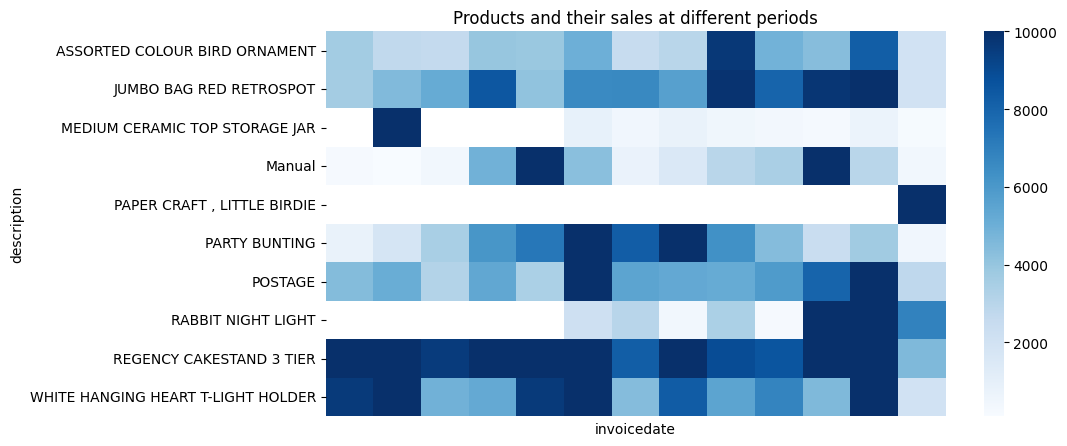

In [62]:
plt.figure(figsize=(10,5))
sns.heatmap(mon_piv,cmap="Blues",vmax=10000)
plt.title("Products and their sales at different periods")
plt.xticks([])

The heatmap shows that revenue is heavily concentrated in a few products and specific months.

Some products generate consistent sales across periods (dark bands), while others show seasonal spikes. This indicates uneven demand distribution and supports the earlier finding that a small group of products drives most revenue.

Focus inventory and promotions on consistently high-performing products and prepare for seasonal demand peaks.

In [63]:
#return analysis

can_sum=cancelled_df.groupby("description").agg(revenue=("revenue","sum"),
                                        quantity=("quantity","sum"),
                                        orders=("invoiceno","nunique")).abs().reset_index()
can_sum

,description,revenue,quantity,orders
0,50'S CHRISTMAS GIFT BAG LARGE,2.50,2,1
1,DOLLY GIRL BEAKER,8.75,7,2
2,OVAL WALL MIRROR DIAMANTE,49.75,5,3
3,SET 2 TEA TOWELS I LOVE LONDON,25.40,8,3
4,SPACEBOY BABY GIFT SET,101.70,6,3
...,...,...,...,...
1967,ZINC SWEETHEART WIRE LETTER RACK,15.00,4,1
1968,ZINC T-LIGHT HOLDER STAR LARGE,10.45,11,2
1969,ZINC T-LIGHT HOLDER STARS SMALL,36.52,44,3
1970,ZINC TOP 2 DOOR WOODEN SHELF,76.75,5,2


In [64]:
returned_orders=can_sum["quantity"].sum()
sold_orders=c["quantity"].sum()

return_perc=round(returned_orders*100/sold_orders,2)

return_perc

np.float64(5.37)

In [65]:
revenue_lost=cancelled_df["revenue"].abs().sum()
revenue_lost

np.float64(896812.49)

In [66]:
can_order_by_countries=cancelled_df.groupby('country')["revenue"].sum().abs().reset_index()
can_order_by_countries

,country,revenue
0,Australia,1444.04
1,Austria,44.36
2,Bahrain,205.74
3,Belgium,285.38
4,Channel Islands,364.15
5,Cyprus,644.09
6,Czech Republic,119.02
7,Denmark,187.20
8,EIRE,20177.14
9,European Community,8.50


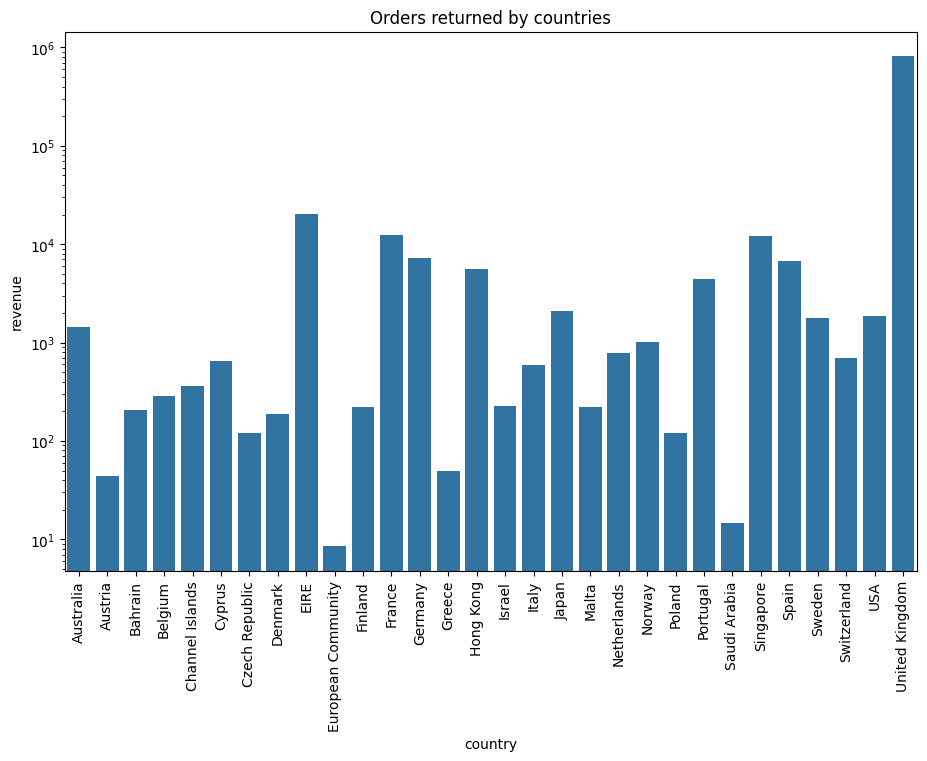

In [67]:
plt.figure(figsize=(11,7))
sns.barplot(data=can_order_by_countries,x="country",y="revenue")
plt.yscale("log")
plt.title('Orders returned by countries')
plt.xticks(rotation=90)
plt.show()

##  Final Project Summary

This project analyzes customer behavior, product performance, and revenue trends using UK retail transactional data.

###  Key Insights

- ~75% of revenue comes from the top 20% of customers, showing strong revenue concentration.
- RFM segmentation identified Champions, Active, At Risk, and Lost customers, with ~1445 customers needing re-engagement.
- ABC analysis confirms that a small group of A-category products drives the majority of revenue.
- Cohort analysis highlights declining retention over time.
- Market basket analysis reveals strong bundling and cross-selling opportunities.
- Revenue shows seasonal and hourly peaks, enabling time-based marketing strategies.

###  Business Recommendations

- Target At Risk and Lost customers with retention campaigns.
- Prioritize inventory and promotions for A-segment products.
- Bundle frequently bought-together items to increase order value.
- Leverage peak sales hours and seasonal trends for marketing optimization.

###  Conclusion

The analysis demonstrates how retail transaction data can generate actionable insights to improve retention, optimize product strategy, and drive revenue growth.
